In [1]:
import pickle as p
import networkx as nx
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
path_result_mat = "./data/OASIS_full_batch/"

In [3]:
def remove_dummy_nodes(graph):
    G = graph.copy()
    to_remove = []
    for (p, d) in G.nodes(data=True):
        if d['is_dummy'] == True:
            to_remove.append(p)
    G.remove_nodes_from(to_remove)
    return G

In [31]:
sing_graph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_24.gpickle", "rb" ))

In [30]:
is_dummy = []
for i in range(134):
    graph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    is_dummy.append(list(nx.get_node_attributes(graph,"is_dummy").values()))
    
is_dummy_vect = [val for sublist in is_dummy for val in sublist]

In [28]:
np.where(np.array(is_dummy_vect)==True)[0]

array([   83,    84,    85, ..., 13531, 13532, 13533])

In [21]:
# First select the graph with highest number nodes
max_node = 0
largest_graph = 0
for i in range(134):
    g = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    g = remove_dummy_nodes(g)
    if len(g.nodes()) >= max_node:
        max_node = len(g.nodes())
        largest_graph = g
        print(max_node,i)
        lar_graph_ind = i


83 0
91 1
92 5
94 6
95 18
101 24
101 41


In [7]:
x_mSync = sio.loadmat(path_result_mat+"X_mSync.mat")['X']

In [8]:
x_mALS = sio.loadmat(path_result_mat+"X_mALS.mat")['X']

In [22]:
matching_matrix = x_mSync
counter = 0
nb_graphs = 134
nb_nodes = int(matching_matrix.shape[0]/nb_graphs)

match_node_value = {k:[] for k in range(nb_graphs)}

#graph_ref_num = lar_graph_ind

for graph_num in range(nb_graphs):
    
    graph_ref_num = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(graph_num)+".gpickle","rb"))

    rscope = range(graph_num * nb_nodes, (graph_num + 1) * nb_nodes)

    for i in range(nb_graphs-1):
        
        iscope = range(i * nb_nodes, (i+1)*nb_nodes)
        Xri = np.array(matching_matrix[np.ix_(rscope, iscope)], dtype=int)
        
        graph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
                   
        for j in range(Xri.shape[0]):  
            if graph.nodes[j]['is_dummy'] == False and len(np.where(Xri[j,:]==1)[0])!=0:                
                
                       #if graph_ref_num.nodes[int(np.where(Xri[j,:]==1)[0])]['is_dummy'] == False:
                    
                        if len(np.where(Xri[j,:]==1)[0])>1:
                            
                            counter+=1
                       
                               #match_node_value[int(np.where(Xri[j,:]==1)[0])].append(1)
print(counter)



0


In [56]:
indexes = np.where(matching_matrix[6,:]==1)[0]

In [140]:
matching_matrix = x_mALS
nb_graphs = 134
list_graphs = []
for i in range(nb_graphs):
    match_label_per_graph={}
    
    g = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    nb_nodes = len(g.nodes)
    scope = range(i * nb_nodes, (i + 1) * nb_nodes)
    
    for node_indx,ind in enumerate(scope):
        match_indexes = np.where(matching_matrix[ind,:]==1)[0]
        match_perc = (len(match_indexes) - len(set(match_indexes).intersection(np.where(np.array(is_dummy_vect)==True)[0])))/nb_graphs
        match_label_per_graph[node_indx] = {'label_color':match_perc}
        
    nx.set_node_attributes(g, match_label_per_graph)
    list_graphs.append(g)
        

In [34]:
test_scope = range(24 * 101, (24 + 1) * 101)

In [93]:
matching_matrix = x_mALS
attr_sum = []
large_grph_ind = 24
large_grph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(large_grph_ind)+".gpickle", "rb" ))
nb_nodes = len(large_grph.nodes)
row_scope = range(large_grph_ind * nb_nodes, (large_grph_ind + 1) * nb_nodes)

for i in range(134):
    grph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    nb_nodes = len(grph.nodes)
    
    col_scope = range(i * nb_nodes, (i + 1) * nb_nodes)
    
    perm_X = np.array(matching_matrix[np.ix_(row_scope, col_scope)], dtype=int)

    for node_indx,ind in enumerate(row_scope):
        match_indexes = np.where(perm_X[node_indx,:]==1)[0]
        attr_sum.append(match_indexes)

In [94]:
len(attr_sum)

13534

In [90]:
len(attr_sum[0])

0

In [92]:
match_indexes[0]

79

In [142]:
match_list = list(nx.get_node_attributes(remove_dummy_nodes(list_graphs[0]),'label_color').values())

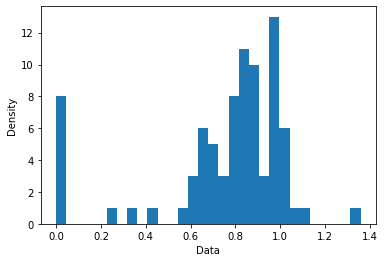

In [143]:
plt.hist(match_list, density=False, bins=30)  # density=False would make counts
plt.ylabel('Density')
plt.xlabel('Data');

In [2]:
pw_kergm = sio.loadmat('X_pairwise_kergm.mat')
pw_gguess = sio.loadmat('X_pairwise_goodguess.mat')

In [5]:
pw_gguess['full_assignment_mat'].shape

(400, 400)

In [6]:
pw_kergm['full_assignment_mat'].shape

(400, 400)

In [10]:
gr = nx.read_gpickle('graph_1.gpickle')

In [11]:
gr.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [24]:
blk_diag = np.diagflat(np.ones(30*20))

In [28]:
blk_diag_dict = {'full_assignment_mat':blk_diag}

In [29]:
blk_diag_dict

{'full_assignment_mat': array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])}

In [37]:
blk_diag.shape

(600, 600)

In [31]:
#sio.savemat('X_pairwise_block_diagonal.mat',blk_diag_dict)

In [39]:
rand_bin_mat = np.mod(np.random.permutation(600*600).reshape(600,600),2)

In [41]:
rand_mat_dict = {'full_assignment_mat':rand_bin_mat}

In [43]:
#sio.savemat('X_pairwise_rand_bin.mat',rand_mat_dict)

In [48]:
sio.loadmat('X_pairwise_block_diagonal.mat')["full_assignment_mat"]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [47]:
blk_diag

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [51]:
Result_pairwise = pickle.load(open('Result_pairwise.pickle', "rb"))
Result_pairwise

[{'parameter_correspondence': {'noise': [100.0, 300.0, 500.0, 700.0, 900.0],
   'outliers': [0.0]},
  'KerGM': array([[[0.34333333]],
  
         [[0.83912281]],
  
         [[0.95421053]],
  
         [[0.98017544]],
  
         [[0.99210526]]]),
  'mSync': array([[[0.21684211]],
  
         [[0.95140351]],
  
         [[1.        ]],
  
         [[1.        ]],
  
         [[1.        ]]]),
  'Hippi': array([[[0.98666667]],
  
         [[0.99333333]],
  
         [[1.        ]],
  
         [[1.        ]],
  
         [[1.        ]]]),
  'mALS': array([[[0.53157895]],
  
         [[0.88      ]],
  
         [[0.80035088]],
  
         [[0.80789474]],
  
         [[0.88368421]]])}]

In [52]:
Result_pairwise_block = pickle.load(open('Result_pairwise_block_diagonal.pickle', "rb"))
Result_pairwise_block

[{'parameter_correspondence': {'noise': [100.0, 300.0, 500.0, 700.0, 900.0],
   'outliers': [0.0]},
  'KerGM': array([[[0.34333333]],
  
         [[0.83912281]],
  
         [[0.95421053]],
  
         [[0.98017544]],
  
         [[0.99210526]]]),
  'mSync': array([[[0.]],
  
         [[0.]],
  
         [[0.]],
  
         [[0.]],
  
         [[0.]]]),
  'Hippi': array([[[0.98666667]],
  
         [[0.99333333]],
  
         [[1.        ]],
  
         [[1.        ]],
  
         [[1.        ]]]),
  'mALS': array([[[0.00561404]],
  
         [[0.00526316]],
  
         [[0.00578947]],
  
         [[0.0045614 ]],
  
         [[0.00754386]]])}]

Text(0, 0.5, 'F1-Score')

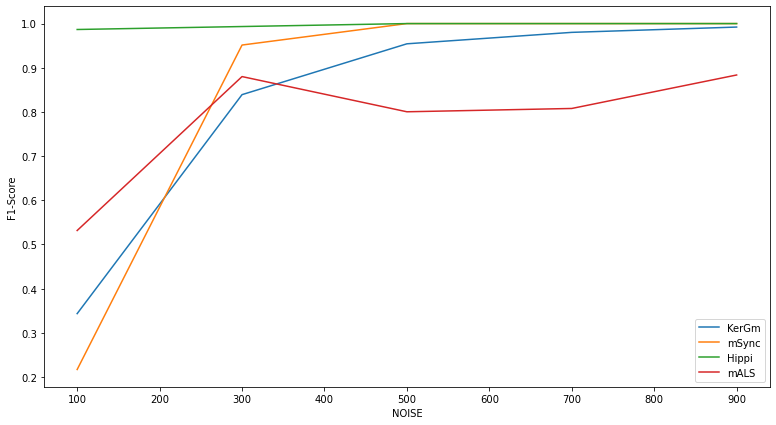

In [64]:
# Plot pairwise
plt.figure(figsize=(13, 7))

Noise = [100,300,500,700,900]
KerGm = [0.3433,0.8391,0.9542,0.9801,0.9921]
mSync = [0.2168,0.9514,1.0,1.0,1.0]
Hippi = [0.9866,0.9933,1.0,1.0,1.0]
mALS = [0.5315,0.88,0.8003,0.8078,0.8836]

plt.plot(Noise,KerGm,label='KerGm')
plt.plot(Noise,mSync,label='mSync')
plt.plot(Noise,Hippi,label='Hippi')
plt.plot(Noise,mALS,label='mALS')
plt.legend(loc="lower right")
plt.xlabel('NOISE')
plt.ylabel('F1-Score')

Text(0, 0.5, 'F1-Score')

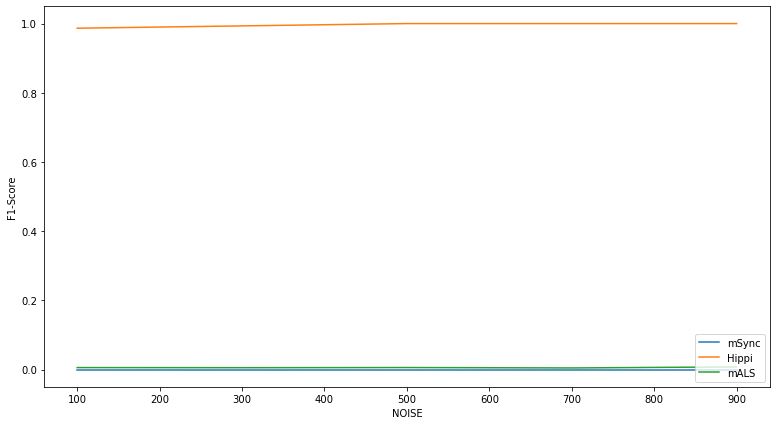

In [67]:
plt.figure(figsize=(13, 7))
mSync = [0.0,0.0,0.0,0.0,0.0]
mALS = [0.0056,0.0052,0.0057,0.0045,0.0075]
Hippi = [0.9866,0.9933,1.0,1.0,1.0]

plt.plot(Noise,mSync,label='mSync')
plt.plot(Noise,Hippi,label='Hippi')
plt.plot(Noise,mALS,label='mALS')
plt.legend(loc="lower right")
plt.xlabel('NOISE')
plt.ylabel('F1-Score')

In [ ]:
path = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/small_trials/0/noise_100,outliers_0/0/graphs/'

In [82]:
rng = np.random.default_rng()

u = rng.normal(size=(600,600))

In [83]:
import scipy.optimize as sco

def u_projector(v, sizes):
    """
    Projections over a set of permutation (for each graph)

    :param v: the current approximation matrix
    :param sizes: the sizes of the different graphs
    :return: the projected version of v
    """
    u = np.zeros(v.shape)
    index = 0
    for size in sizes:
        vi = v[index:index+size, :]
        r, c = sco.linear_sum_assignment(-vi)
        for i in range(r.shape[0]):
            u[r[i]+index, c[i]] = 1
        index += size
    return u

In [84]:
os.listdir(path)

['graph_13.gpickle',
 'graph_8.gpickle',
 'graph_0.gpickle',
 'graph_2.gpickle',
 'graph_16.gpickle',
 'graph_9.gpickle',
 'graph_1.gpickle',
 'graph_15.gpickle',
 'graph_18.gpickle',
 'graph_10.gpickle',
 'graph_7.gpickle',
 'graph_11.gpickle',
 'graph_3.gpickle',
 'graph_19.gpickle',
 'graph_6.gpickle',
 'graph_5.gpickle',
 'graph_4.gpickle',
 'graph_14.gpickle',
 'graph_17.gpickle',
 'graph_12.gpickle']

In [85]:
all_graphs = []

for g in os.listdir(path):
    all_graphs.append(nx.read_gpickle(path+g))
    
sizes = [nx.number_of_nodes(gr) for gr in all_graphs]

In [89]:
u = u_projector(u, sizes)

u = {'full_assignment_mat':u}

In [90]:
# sio.savemat('X_pairwise_rand_bin.mat',u)

In [88]:
#np.nonzero(u)

In [9]:
Result_pairwise_random = pickle.load(open('Result_pairwise_random.pickle', "rb"))
Result_pairwise_random

[{'parameter_correspondence': {'noise': [100.0, 300.0, 500.0, 700.0, 900.0],
   'outliers': [0.0]},
  'KerGM': array([[[0.34333333]],
  
         [[0.83912281]],
  
         [[0.95421053]],
  
         [[0.98017544]],
  
         [[0.99210526]]]),
  'mSync': array([[[0.]],
  
         [[0.]],
  
         [[0.]],
  
         [[0.]],
  
         [[0.]]]),
  'Hippi': array([[[0.98666667]],
  
         [[0.99333333]],
  
         [[1.        ]],
  
         [[1.        ]],
  
         [[1.        ]]]),
  'mALS': array([[[0.00578947]],
  
         [[0.0045614 ]],
  
         [[0.00649123]],
  
         [[0.00491228]],
  
         [[0.00631579]]])}]

Text(0, 0.5, 'F1-Score')

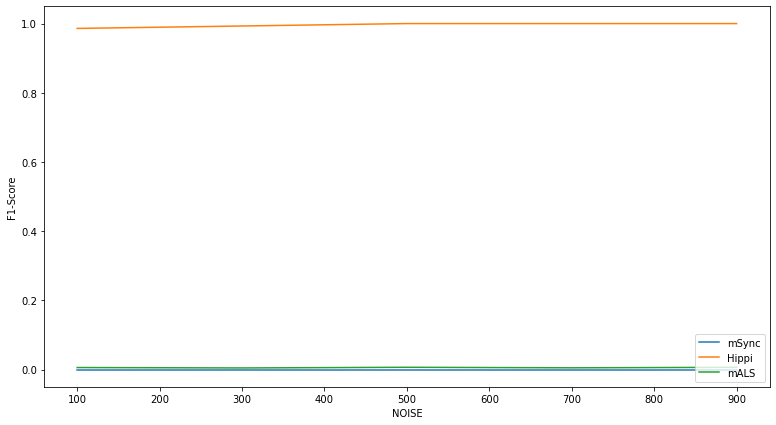

In [6]:
# Plot pairwise
plt.figure(figsize=(13, 7))

Noise = [100,300,500,700,900]
mSync = [0.0,0.0,0.0,0.0,0.0]
Hippi = [0.986,0.993,1.0,1.0,1.0]
mALS = [0.0057,0.0045,0.0064,0.0049,0.0063]

plt.plot(Noise,mSync,label='mSync')
plt.plot(Noise,Hippi,label='Hippi')
plt.plot(Noise,mALS,label='mALS')
plt.legend(loc="lower right")
plt.xlabel('NOISE')
plt.ylabel('F1-Score')

In [2]:
full_node_affinity = np.load('Full_node_affinity.npy')

In [7]:
full_node_affinity.shape

(600, 600)

In [18]:
# sio.loadmat('X_affinity.mat')['full_assignment_mat']

In [19]:
Result_pairwise_affinity = pickle.load(open('Result_pairwise_affinity_and_random.pickle', "rb"))
Result_pairwise_affinity

[{'parameter_correspondence': {'noise': [100.0, 300.0, 500.0, 700.0, 900.0],
   'outliers': [0.0]},
  'Hippi': array([[[0.98666667]],
  
         [[0.99333333]],
  
         [[1.        ]],
  
         [[1.        ]],
  
         [[1.        ]]]),
  'mALS': array([[[0.69578947]],
  
         [[0.81754386]],
  
         [[0.81947368]],
  
         [[0.86385965]],
  
         [[0.8577193 ]]])}]

Text(0, 0.5, 'F1-Score')

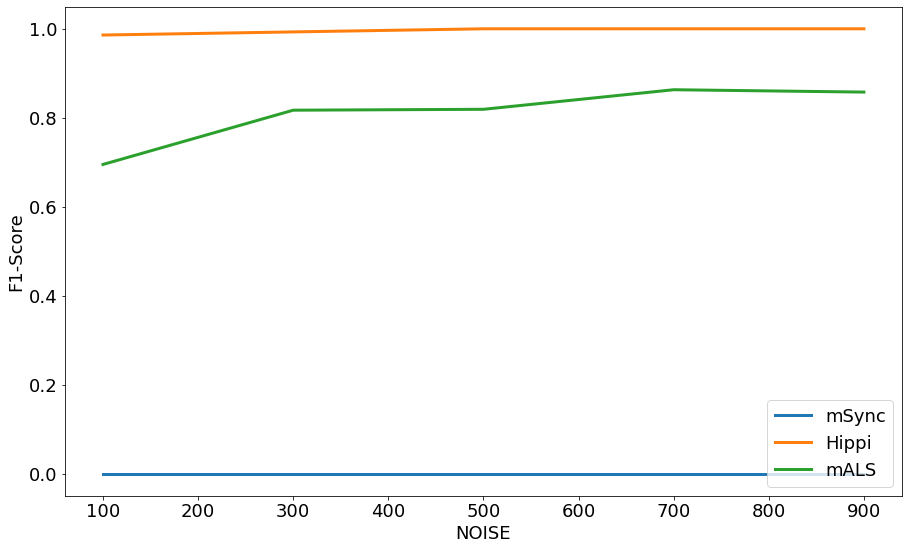

In [29]:
# Plot pairwise
import matplotlib
plt.figure(figsize=(15, 9))
matplotlib.rcParams.update({'font.size': 18})

Noise = [100,300,500,700,900]
mSync = [0.0,0.0,0.0,0.0,0.0]
Hippi = [0.986,0.993,1.0,1.0,1.0]
mALS = [0.695,0.817,0.819,0.863,0.85771]

plt.plot(Noise,mSync,linewidth = 3,label='mSync')
plt.plot(Noise,Hippi,linewidth = 3,label='Hippi')
plt.plot(Noise,mALS,linewidth = 3,label='mALS')
plt.legend(loc="lower right")
plt.xlabel('NOISE')
plt.ylabel('F1-Score')

In [147]:
Result_kmeans = pickle.load(open('Result_kmeans.pickle', "rb"))
Result_kmeans

[{'parameter_correspondence': {'noise': [100.0, 300.0, 500.0, 700.0, 900.0],
   'outliers': [0.0]},
  'Kmeans': array([[[0.96070175]],
  
         [[0.99666667]],
  
         [[1.        ]],
  
         [[1.        ]],
  
         [[1.        ]]]),
  'mSync': array([[[0.83210526]],
  
         [[0.93666667]],
  
         [[1.        ]],
  
         [[1.        ]],
  
         [[1.        ]]]),
  'Hippi': array([[[0.98666667]],
  
         [[0.99333333]],
  
         [[1.        ]],
  
         [[1.        ]],
  
         [[1.        ]]]),
  'mALS': array([[[0.89649123]],
  
         [[0.96666667]],
  
         [[1.        ]],
  
         [[1.        ]],
  
         [[1.        ]]])}]

Text(0, 0.5, 'F1-Score')

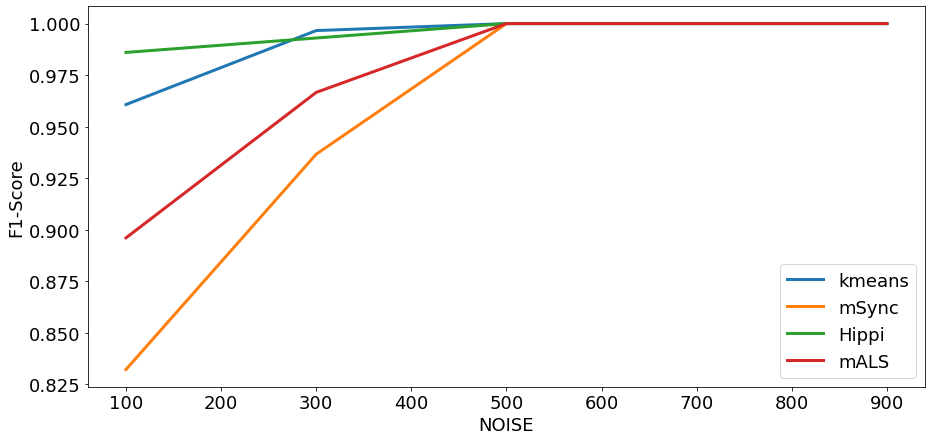

In [151]:
# Plot pairwise
import matplotlib
plt.figure(figsize=(15, 7))
matplotlib.rcParams.update({'font.size': 18})

Noise = [100,300,500,700,900]
kmeans = [0.9607,0.9966,1. ,1. ,1. ]
mSync = [0.8321,0.9366,1.,1.,1.]
Hippi = [0.986,0.993,1.0,1.0,1.0]
mALS = [0.896,0.9666,1.,1.,1.]

plt.plot(Noise,kmeans,linewidth = 3,label='kmeans')
plt.plot(Noise,mSync,linewidth = 3,label='mSync')
plt.plot(Noise,Hippi,linewidth = 3,label='Hippi')
plt.plot(Noise,mALS,linewidth = 3,label='mALS')
plt.legend(loc="lower right")
plt.xlabel('NOISE')
plt.ylabel('F1-Score')

In [ ]:
path_graph = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/small_trials/0/noise_900,outliers_0/0/graphs/'

all_graphs = os.listdir(path_graph)

In [137]:
import re

def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)


graphs = []
for data_file in sorted_alphanumeric(all_graphs):
    graphs.append(data_file)

In [138]:
all_coords = []
for g in graphs:
    graph = nx.read_gpickle(path_graph+g)
    coords = np.array(list(nx.get_node_attributes(graph,'coord').values()))
    all_coords.extend(coords)
all_coords = np.array(all_coords)

In [139]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(graph.nodes), random_state=0).fit(all_coords)

In [140]:
def get_matching_from_labelling(nb_nodes, nb_graphs, clustering_labels, use_precision=False):
    """
    Transform the labelling into a bulk matrix
    that represent the matching.
    """

    nb_tot_node = nb_graphs * nb_nodes

    # initialise bulk_matrix
    bulk_permutation_matrix = np.zeros((nb_tot_node,nb_tot_node))

    # fill the matrix
    for i in range(clustering_labels.shape[0]):
        for j in range(i+1, clustering_labels.shape[0]):

            if clustering_labels[i] == clustering_labels[j] and clustering_labels[i] != -1:
                graph_i = i // nb_nodes
                graph_j = j // nb_nodes
                node_i = i % nb_nodes
                node_j = j % nb_nodes

                if graph_i != graph_j:

                    bulk_permutation_matrix[graph_i * nb_nodes + node_i, graph_j * nb_nodes + node_j] = 1

                    
    bulk_permutation_matrix = bulk_permutation_matrix + bulk_permutation_matrix.T + np.eye(bulk_permutation_matrix.shape[0])
    return bulk_permutation_matrix

In [141]:
#kmeans.labels_

In [142]:
perm_mat = get_matching_from_labelling(30,20,kmeans.labels_)

In [143]:
# X_kmeans = {'full_assignment_mat':perm_mat}

In [145]:
# sio.savemat('X_kmeans.mat',X_kmeans)

In [68]:
data_path = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/test_with_dummy/1/noise_100,outliers_varied/0/'

In [77]:
g1 = nx.read_gpickle(data_path + '/graphs/graph_00000.gpickle')
g2 = nx.read_gpickle(data_path + '/graphs/graph_00001.gpickle')
g6 = nx.read_gpickle(data_path + '/graphs/graph_00006.gpickle')

In [72]:
aff_1 = sio.loadmat(data_path + '/affinity/full_affinity_00000_00002.mat')

In [34]:
all_graphs = [nx.read_gpickle(data_path + '/graphs/' + g) for g in np.sort(os.listdir(data_path + '/graphs'))]

In [37]:
sizes = [nx.number_of_nodes(g) for g in all_graphs]

In [73]:
aff_1['full_affinity'].shape

(676, 676)

In [70]:
aff_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'full_affinity'])

In [64]:
affinity_matrix = np.zeros((np.power(27, 2), np.power(27,2)))

In [67]:
g1.nodes[0]

{'coord': array([ 10.98892599, -13.77475617, -98.43525587]),
 'is_dummy': False,
 'is_outlier': False}

In [104]:
g1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25))

In [52]:
# i = 1
# while i < 10:
#     i += 1
#     if i%2 == 0:
#         continue
#     print(i,end='\r')
    

In [4]:
path = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/NEW_SIMUS_JULY_11/0/noise_1000,outliers_varied/graphs/'

import os

all_graphs = os.listdir(path)
all_graphs = [nx.read_gpickle(path + g) for g in all_graphs]

In [5]:
all_nodes = [nx.number_of_nodes(g) for g in all_graphs]

In [6]:
np.mean(all_nodes)

87.82481751824818

In [7]:
np.std(all_nodes)

4.327636212261668

In [5]:
g_real = nx.read_gpickle('../data/Oasis_original_new/graph_0.gpickle')
g_real.nodes.data()[0]

{'vertex_index': 1357,
 'sphere_3dcoords': [6.501389026641846,
  -93.98175048828125,
  -33.54344177246094],
 'sphere_coords': [-1.5017292499542236, 1.9128626585006714],
 'basin_label': 307.0,
 'basin_area': 447.01047,
 'depth': -0.18439683,
 'basin_thickness': 2.5869646072387695,
 'ico100_7_vertex_index': 7574,
 'label_neuroimage': 28,
 'label_media': 90,
 'sphere_3dcoords_noreg': array([ 17.402021, -91.770744, -35.71135 ], dtype=float32),
 'ico100_7_vertex_index_noreg': 11492}

### Mean real data: 88.27737226277372
### STD real data: 4.72720025935832

In [9]:
1.0958e+03

1095.8

In [10]:
20000 * 20000

400000000